In [ ]:
!pip install qiskit
!pip install qiskit-aer
!pip install qiskit-ibm-runtime
!pip install pylatexenc

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 339.7/339.7 kB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.7/60.7 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.4/121.4 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 9.4 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing inst

In [1]:
from qiskit_ibm_runtime import QiskitRuntimeService

# Save an IBM Quantum account and set it as your default account.
QiskitRuntimeService.save_account(channel="ibm_quantum", token="962c599bc54796e9373a1c89ff54342e0a0a754bf78ab3ff4fc127616c082ffc5c496be23ae0ddf9ce7bf68f869ffb51d6be065bd4cba90da8a321a246fbf15f", overwrite=True)

# Load saved credentials
service = QiskitRuntimeService()

# General functions

In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
import numpy as np
import matplotlib.pyplot as plt


def generate_random_bits(n, seed=None):
    """Generate an array of n random bits with an optional seed for reproducibility."""
    rng = np.random.default_rng(seed)
    return rng.integers(0, 2, size=n)


def print_bit_array(array):
    """Convert an array of bits into a bit string representation."""
    return ''.join(str(bit) for bit in array)


def introduce_noise(bob_bits, error_rate):
    """Introduce noise by flipping some of Bob's bits with a given error rate."""
    noisy_bob_bits = []
    for bit in bob_bits:
        if np.random.rand() < error_rate:
            noisy_bob_bits.append(1 - bit)  # Flip the bit to introduce an error
        else:
            noisy_bob_bits.append(bit)
    return noisy_bob_bits


def select_random_fraction(sifted_keys, fraction=0.1, seed=None):
    """Select a random fraction of bits from the sifted key for comparison."""
    rng = np.random.default_rng(seed)
    indices = rng.choice(len(sifted_keys), int(len(sifted_keys) * fraction), replace=False)
    selected_keys = [sifted_keys[i] for i in indices]
    return selected_keys


def visualize_statistics(alice_bits, alice_bases, bob_bases, bob_bits, sifted_keys, error_rate, counts_0, counts_1, title, eve_bases=None):
    """Visualize comprehensive statistics of the BB84 protocol."""

    """
    This function visualizes various statistics of the BB84 protocol, including:
    1. Counts per qubit.
    2. Histogram of Bob's measured bits.
    3. Error rate over the sifted keys.
    4. Bases used by Alice, Bob, and optionally Eve.
    5. Agreement rate of the sifted keys.

    Parameters:
    - alice_bits: List or array of bits sent by Alice.
    - alice_bases: List or array of bases used by Alice.
    - bob_bases: List or array of bases used by Bob.
    - bob_bits: List or array of bits measured by Bob.
    - sifted_keys: List of tuples representing sifted keys (Alice's and Bob's bits).
    - error_rate: Error rate of the sifted keys.
    - counts_0: List or array of counts for basis 0.
    - counts_1: List or array of counts for basis 1.
    - title: Title for the plots.
    - eve_bases: (Optional) List or array of bases used by Eve.
    """

    # Primera fila de gráficos
    plt.figure(figsize=(16, 6))  # Ajusta el tamaño de la figura para la primera fila de gráficos

    # Gráfico de cuentas por qubit
    plt.subplot(1, 3, 1)  # Crea un subplot para el primer gráfico
    ind = np.arange(len(counts_0))
    width = 0.35
    plt.bar(ind, counts_0, width, label='Counts 0')
    plt.bar(ind, counts_1, width, bottom=counts_0, label='Counts 1')
    plt.xlabel('Qubit Index')
    plt.ylabel('Counts')
    plt.title(f'Counts per Qubit ({title})')
    plt.legend()

    # Histograma de bits medidos por Bob
    plt.subplot(1, 3, 2)  # Crea un subplot para el segundo gráfico
    hist, bins, patches = plt.hist(bob_bits, bins=2, edgecolor='black')
    plt.xticks([0.25, 0.75], ['0', '1'])  # Centra las marcas de los ticks para los bits de Bob
    plt.xlabel('Bob\'s Measured Bits')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of Bob\'s Measured Bits ({title})')

    # Añade los números de cuenta en la parte superior de las barras
    bin_counts = np.bincount(bob_bits)
    for patch, value in zip(patches, bin_counts):
        if value != 0:  # Solo añade la etiqueta si hay cuentas en el bin
            plt.annotate(str(value), xy=(patch.get_x() + patch.get_width() / 2, patch.get_height()),
                         xytext=(0, 3), textcoords='offset points',
                         ha='center', va='bottom')

    plt.ylim(0, max(bin_counts) * 1.2)  # Ajusta el límite del eje y para acomodar los números de cuenta

    # Gráfico de tasa de error
    plt.subplot(1, 3, 3)  # Crea un subplot para el tercer gráfico
    plt.plot(range(len(sifted_keys)), [int(a != b) for a, b in sifted_keys], 'ro-')
    plt.xlabel('Key Index')
    plt.ylabel('Error (1=Error, 0=Correct)')
    plt.title(f'Error Rate ({title})')
    plt.text(0.95, 0.95, f'Error Rate: {error_rate:.2%}',
             verticalalignment='top', horizontalalignment='right',
             transform=plt.gca().transAxes,
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

    plt.tight_layout()  # Ajusta el diseño para la primera fila de gráficos
    plt.show()  # Muestra la primera fila de gráficos

    # Segunda fila de gráficos
    num_subplots = 3 if eve_bases is not None else 2
    plt.figure(figsize=(16, 6))  # Ajusta el tamaño de la figura para la segunda fila de gráficos

    # Bases usadas por Alice, Bob (y Eve si está presente)
    plt.subplot(1, num_subplots, 1)  # Crea un subplot para el cuarto gráfico
    labels = ['Z', 'X']
    alice_counts = [np.sum(alice_bases == 0), np.sum(alice_bases == 1)]
    bob_counts = [np.sum(bob_bases == 0), np.sum(bob_bases == 1)]

    if eve_bases is not None:
        eve_counts = [np.sum(eve_bases == 0), np.sum(eve_bases == 1)]
        data = [alice_counts, bob_counts, eve_counts]
        names = ['Alice', 'Bob', 'Eve']
        colors = ['blue', 'orange', 'green']
        width = 0.25
    else:
        data = [alice_counts, bob_counts]
        names = ['Alice', 'Bob']
        colors = ['blue', 'orange']
        width = 0.35

    x = np.arange(len(labels))  # Ubicaciones de las etiquetas

    for i in range(len(data)):
        plt.bar(x + (i - len(data) / 2) * width, data[i], width, label=names[i], color=colors[i])
        # Añade los números de cuenta en la parte superior de las barras
        for j, count in enumerate(data[i]):
            plt.text(x[j] + (i - len(data) / 2) * width, count, str(count), ha='center', va='bottom')

    plt.xlabel('Bases')
    plt.ylabel('Frequency')
    plt.title(f'Bases Used by {" and ".join(names)} ({title})')
    plt.xticks(x, labels)
    plt.legend(loc='best', bbox_to_anchor=(1, 1), borderaxespad=1, fontsize=10)

    y_max = max([max(counts) for counts in data])
    plt.ylim(0, y_max * 1.2)  # Ajusta el límite del eje y para hacer espacio para la leyenda

    # Tasa de acuerdo de las claves filtradas
    plt.subplot(1, num_subplots, 2)  # Crea un subplot para el quinto gráfico
    agreement = [int(a == b) for a, b in sifted_keys]
    plt.bar(['Agree', 'Disagree'], [agreement.count(1), agreement.count(0)], color=['green', 'red'])
    plt.ylabel('Count')
    plt.title(f'Agreement Rate of Sifted Keys ({title})')
    for i, value in enumerate([agreement.count(1), agreement.count(0)]):
        plt.text(i, value, str(value), ha='center', va='bottom')

    if eve_bases is not None:
        # Probabilidad de detectar a Eve
        plt.subplot(1, num_subplots, 3)  # Crea un subplot para el sexto gráfico si Eve está presente
        n_tilde = np.arange(1, len(sifted_keys) / 3 + 1)
        p_eve = (3 / 4) ** n_tilde
        p_detect = 1 - p_eve
        plt.plot(n_tilde, p_detect, label="Probability of Detecting Eve", color="skyblue")
        plt.xlabel('Number of Compared Bits (ñ)')
        plt.ylabel('Probability of Detecting Eve')
        plt.title(f'Probability of Detecting Eve ({title})')
        plt.grid(True)
        plt.legend()

    plt.tight_layout()  # Ajusta el diseño para la segunda fila de gráficos
    plt.show()  # Muestra la segunda fila de gráficos


def create_bb84_circuits(n, alice_bits, alice_bases, bob_bases, eve_bases=None, eve_present=False):
    """Create a list of BB84 quantum circuits."""
    circuits = []
    for i in range(n):
        qc = QuantumCircuit(1, 1)

        # Alice's preparation
        if alice_bits[i] == 1:
            qc.x(0)
        if alice_bases[i] == 1:
            qc.h(0)
        qc.barrier()

        # Eve's eavesdropping
        if eve_present:
            if eve_bases[i] == 1:
                qc.h(0)
            qc.measure(0, 0)
            qc.barrier()

        # Bob's measurement
        if bob_bases[i] == 1:
            qc.h(0)
        qc.measure(0, 0)

        circuits.append(qc)

    return circuits


def bb84_protocol(n, eve_present=False, noisy_channel=False, shots=1024):
    """Execute the BB84 protocol on a Qiskit simulator."""
    alice_bits = generate_random_bits(n, 2)
    alice_bases = generate_random_bits(n, 4)
    bob_bases = generate_random_bits(n, 6)
    eve_bases = None

    if eve_present:
        eve_bases = generate_random_bits(n, 8)
        circuits = create_bb84_circuits(n, alice_bits, alice_bases, bob_bases, eve_bases, eve_present=True)
    else:
        circuits = create_bb84_circuits(n, alice_bits, alice_bases, bob_bases)

    simulator = Aer.get_backend('qasm_simulator')

    transpiled_circuits = transpile(circuits, simulator)

    results = simulator.run(transpiled_circuits, shots=shots).result()

    counts = [results.get_counts(circ) for circ in circuits]

    # Determine Bob's bit based on the majority vote
    bob_bits = np.array([int(max(count, key=count.get)) for count in counts])

    if noisy_channel:
        bob_bits = introduce_noise(bob_bits, 0.1)

    # Extract counts for '0' and '1'
    counts_0 = [count.get('0', 0) for count in counts]
    counts_1 = [count.get('1', 0) for count in counts]

    # Reconciliation process
    sifted_keys = [(alice_bits[i], bob_bits[i]) for i in range(n) if alice_bases[i] == bob_bases[i]]

    # Error rate calculation
    error_rate = sum(1 for a, b in sifted_keys if a != b) / len(sifted_keys)

    # Resulting key
    sifted_key_bits = [b for a, b in sifted_keys]

    # Calculate the probability of detecting Eve using different fractions of the sifted key
    if eve_present:
      detection_fractions=[0.1, 0.2, 0.3, 0.4, 0.5]
      detection_probabilities = []
      for fraction in detection_fractions:
          selected_keys = select_random_fraction(sifted_keys, fraction=fraction)
          n_tilde = len(selected_keys)
          p_eve = (3/4) ** n_tilde
          p_detect = 1 - p_eve
          detection_probabilities.append(p_detect)

    # Print results
    print("Alice's bits:       ",    print_bit_array(alice_bits))
    print("Alice's bases:      ",    print_bit_array(alice_bases))

    if eve_present:
      print("Eve's bases:        ",  print_bit_array(eve_bases))

    print("Bob's bases:        ",    print_bit_array(bob_bases))
    print("Bob's bits:         ",    print_bit_array(bob_bits), "\n")
    print("Sifted key bits:    ",    print_bit_array(sifted_key_bits))
    print("Sifted key length:  ",    len(sifted_key_bits))
    print("Error rate:         ",    error_rate, "\n")

    if eve_present:
      print("Detection probabilities: ", detection_probabilities, "\n")

    visualize_statistics(alice_bits, alice_bases, bob_bases, bob_bits, sifted_keys, error_rate, counts_0, counts_1, 'Simulator', eve_bases)



# Implementations using the simulator

## 1. BB84: Alice and Bob (Without noise)

Alice's bits:        1000010001111010100101001011100111110000001111111011001110001001110111001111010001010100011011000010
Alice's bases:       1111111001001110110101001001111011111001010101001000110110000111111100110001000011011010001010110100
Bob's bases:         0110101001010110110010111011111100001110111010101101000100100100001100111100110010010011111100101100
Bob's bits:          0001010001101010100100101001100110100001101111111010111100101000110111001111000000011100011111011010 

Sifted key bits:     000000110101001011000011111001001110010000110110010
Sifted key length:   51
Error rate:          0.0 



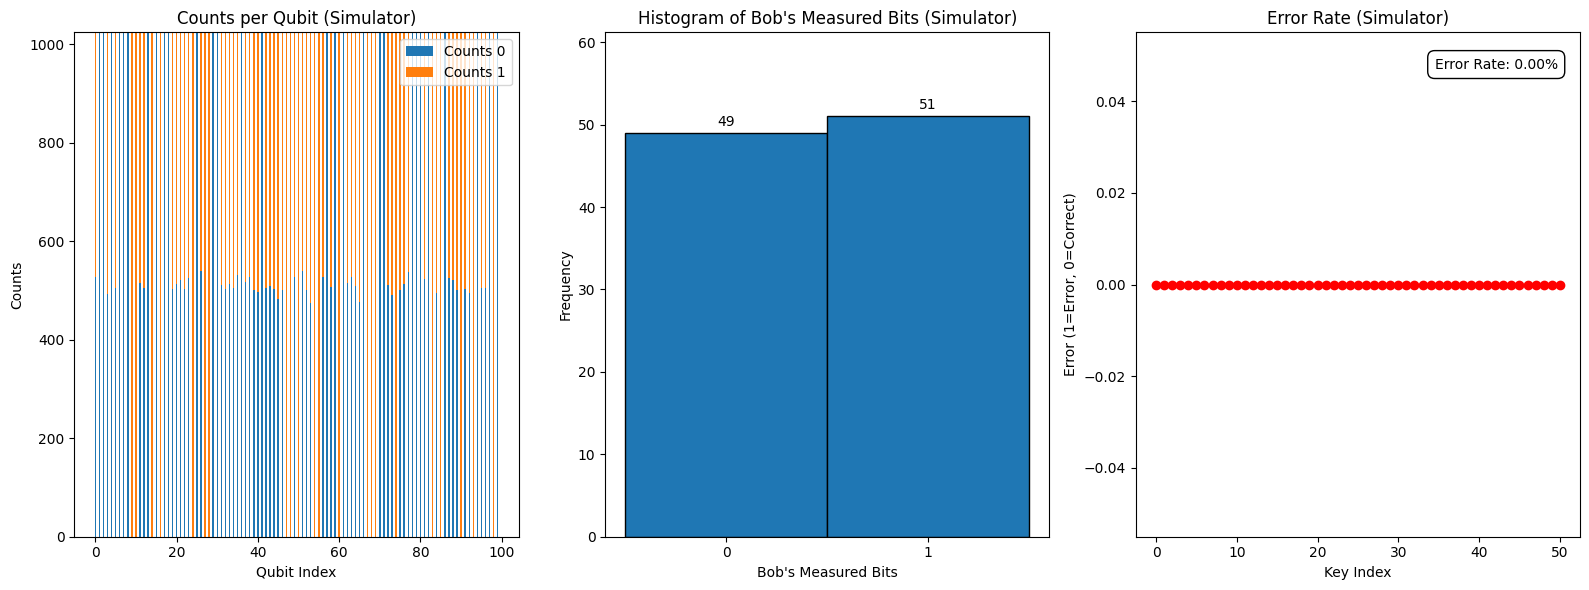

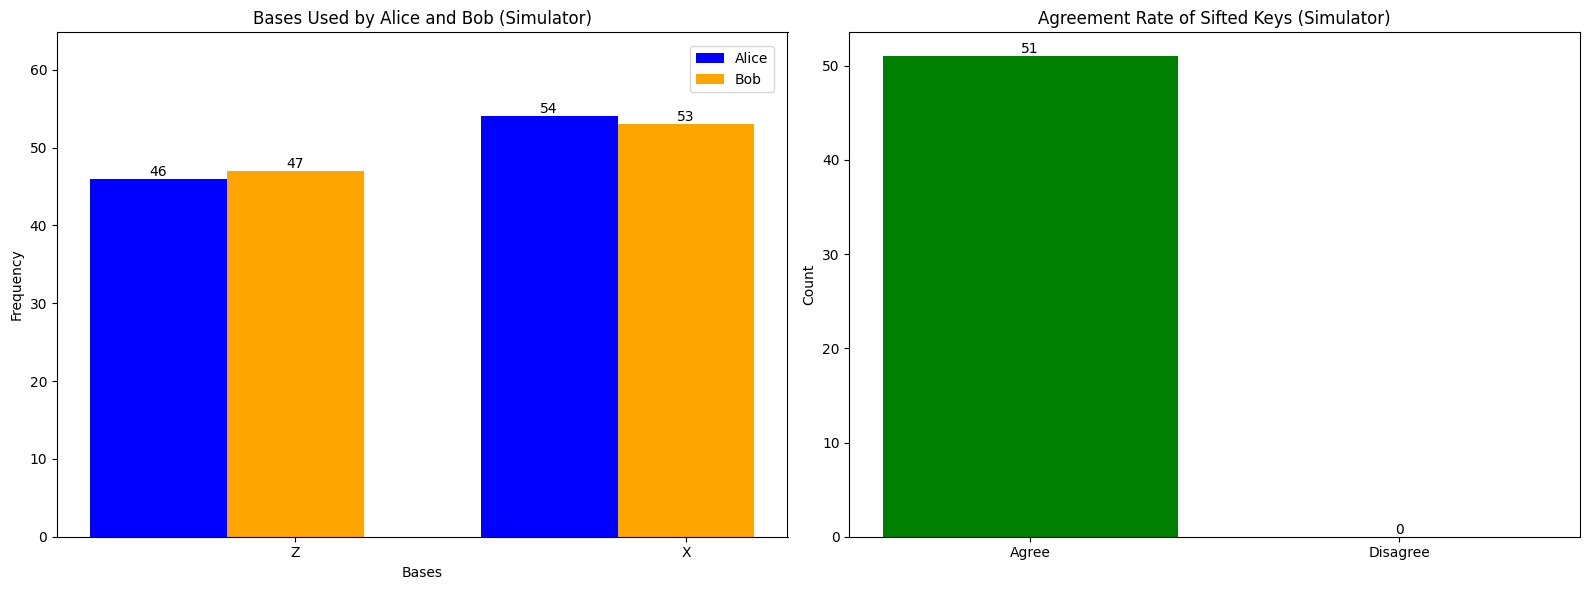

In [3]:
# Number of qubits
n = 100

# Execute the protocol on the simulator
bb84_protocol(n)

## 2. BB84: Alice and Bob (With noise)

Alice's bits:        1000010001111010100101001011100111110000001111111011001110001001110111001111010001010100011011000010
Alice's bases:       1111111001001110110101001001111011111001010101001000110110000111111100110001000011011010001010110100
Bob's bases:         0110101001010110110010111011111100001110111010101101000100100100001100111100110010010011111100101100
Bob's bits:          0000000001111010111011101011100010000100000011110111111110101010000111000110100101010101001001001010 

Sifted key bits:     000000110101111011000010111001001110010100110110010
Sifted key length:   51
Error rate:          0.0784313725490196 



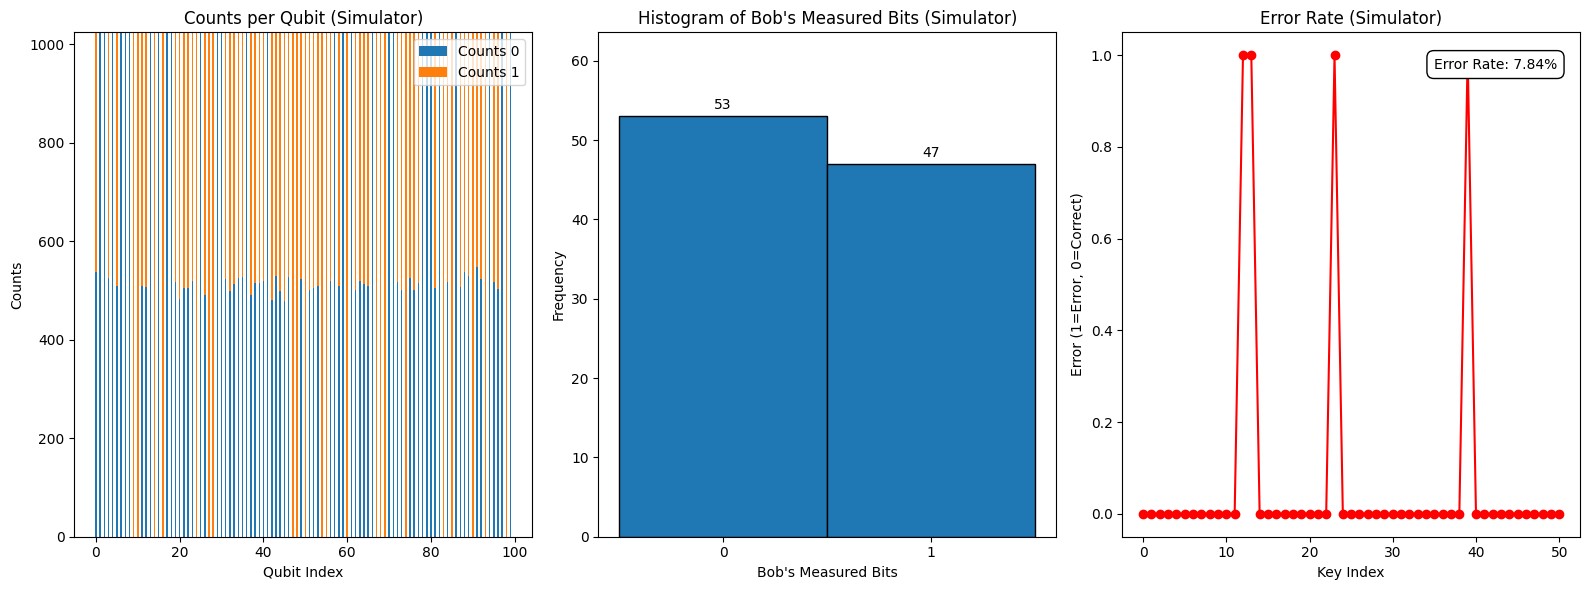

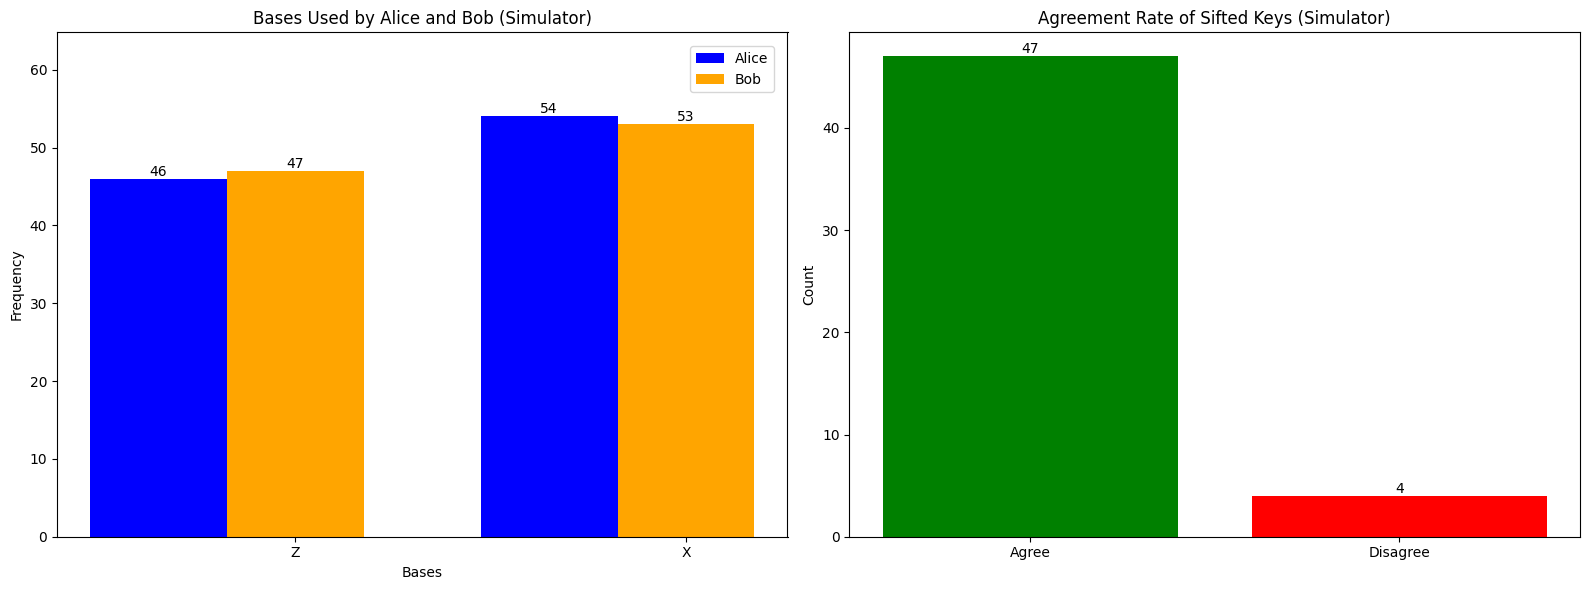

In [ ]:
# Number of qubits
n = 100

# Execute the protocol on the simulator
bb84_protocol(n, noisy_channel=True)

## 3. BB84: Alice, Eve and Bob

Alice's bits:        1000010001111010100101001011100111110000001111111011001110001001110111001111010001010100011011000010
Alice's bases:       1111111001001110110101001001111011111001010101001000110110000111111100110001000011011010001010110100
Eve's bases:         1001001111001000001010100000111000010101011010101000001011000100001010001011110001010110000101100010
Bob's bases:         0110101001010110110010111011111100001110111010101101000100100100001100111100110010010011111100101100
Bob's bits:          1100111100111000000000110001001010010000100101010110001110101010111101011111100001011011010101010110 

Sifted key bits:     101110010000000010010010111001011010110000101010110
Sifted key length:   51
Error rate:          0.35294117647058826 

Detection probabilities:  [0.7626953125, 0.9436864852905273, 0.9866365389898419, 0.996828788061066, 0.999247456541835] 



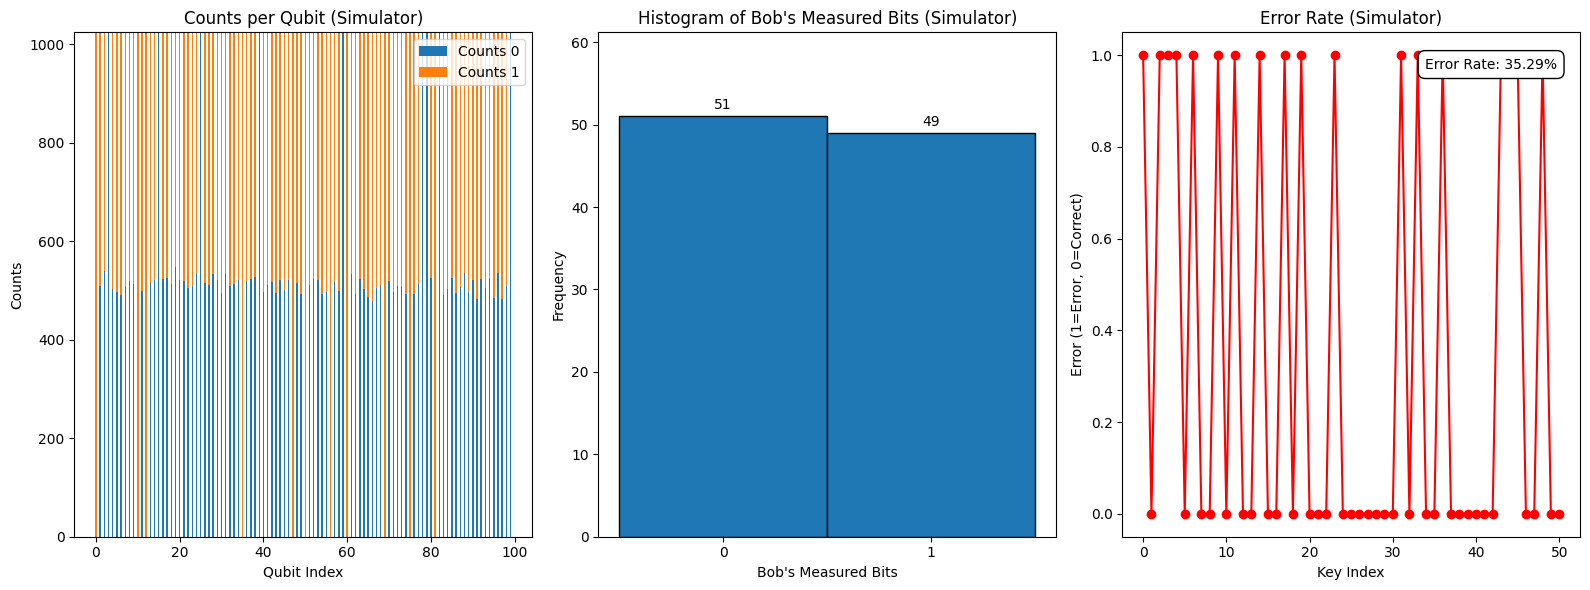

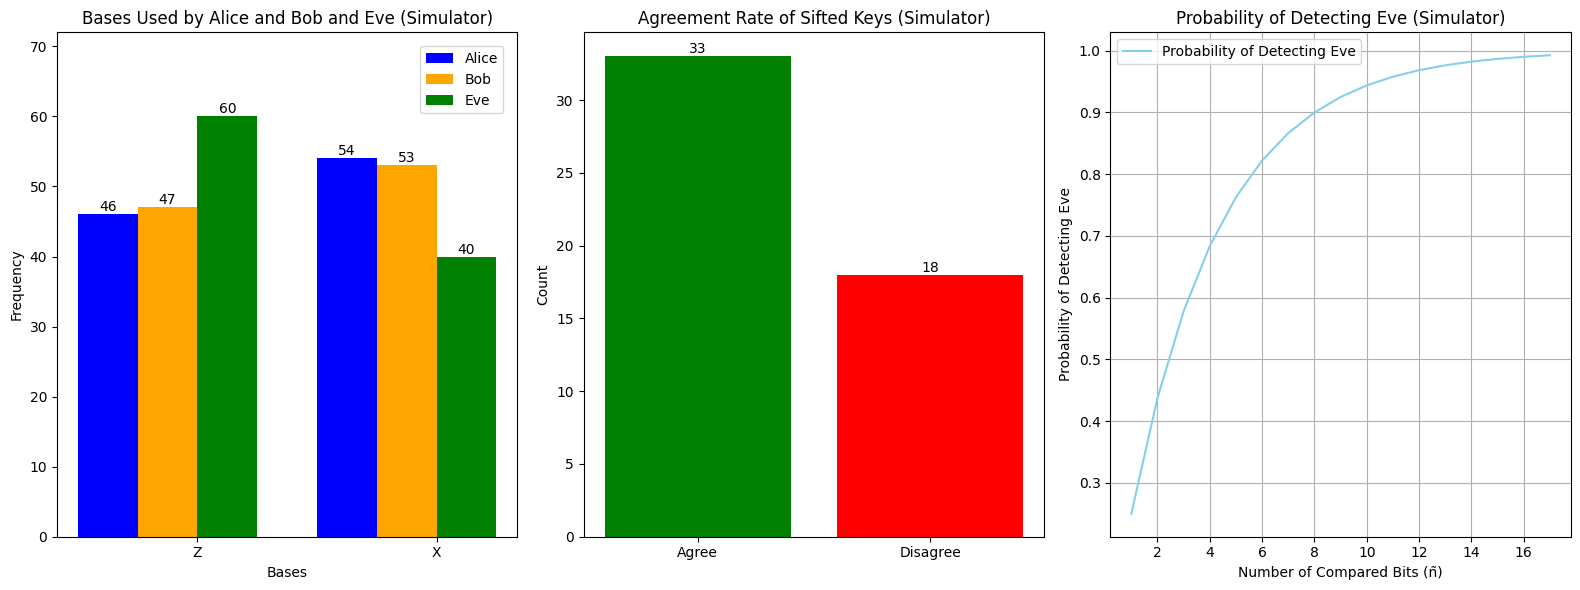

In [ ]:
# Number of qubits
n = 100

# Execute the protocol on the simulator
bb84_protocol(n, eve_present=True)

# Implementations using the IBM Quantum Device

## 1. BB84: Alice and Bob (Without noise)

## 2. BB84: Alice and Bob (With noise)

## 3. BB84: Alice, Eve and Bob

# Interactive simulation

In [15]:
!pip install streamlit
!pip install pyngrok
!ngrok authtoken 2kRv2ds7ZutcqVjEU5KFpXQnTwq_7vSj1roj1nrHFD2p3jwwb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 44.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.6 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0
Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [19]:
%%writefile bb84_simulation.py

from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
import streamlit as st
import numpy as np
import matplotlib.pyplot as plt

# Título de la aplicación
st.title('BB84 Protocol Simulation')

# Parámetros de entrada
num_qubits = st.slider('Número de Qubits', 1, 256, 50)
eve_present = st.checkbox('Incluir a Eve (Eavesdropper)')
noisy_channel = st.checkbox('Canal Ruidoso')
shots = st.slider('Número de Shots', 1, 4096, 1024)

# Ejecutar la simulación
if st.button('Ejecutar Simulación'):
    # Llamar a la función del protocolo BB84
    bb84_protocol(
        num_qubits,
        eve_present=eve_present,
        noisy_channel=noisy_channel,
        shots=shots
    )

    st.success('Simulación completada')

# Visualizar estadísticas
st.write("Estadísticas de la Simulación")

Overwriting bb84_simulation.py


In [20]:
from pyngrok import ngrok
public_url = ngrok.connect(8501)
print(f'Public URL: {public_url}')

Public URL: NgrokTunnel: "https://ca51-34-66-88-42.ngrok-free.app" -> "http://localhost:8501"


In [21]:
!streamlit run bb84_simulation.py &




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.66.88.42:8501

  Stopping...
